# Week 9: Method and Data

**Step 1: Finding the Correlation between Vocational Training Costs and GDP per capita for 2019**

In their article “Vocational Training Costs and Economic Benefits: Exploring the Interactions,” Samoliuk, Bilan, and Mishchuk (2021) focus on identifying whether a positive relationship exists between vocational training costs and economic performance, rather than measuring the magnitude of that relationship. Their approach reflects an interest in the direction and consistency of the link—whether higher training costs are generally associated with higher economic outcomes such as GDP per capita—rather than in quantifying how much GDP increases per unit of cost. The authors note that previous research has already established the measurable economic benefits of training at the firm level, including increases in productivity, wages, and profitability. However, at the macroeconomic level, the connection between education-related investments and growth often produces inconsistent results due to cross-country differences in development and data comparability. For this reason, Samoliuk et al. employ a correlation-based approach (such as the Fechner correlation) that tests whether the relationship is systematically positive across countries, capturing the directional harmony of educational policy and economic outcomes rather than estimating causal strength or effect size. This allows them to generalize patterns of association in EU countries without overstating precision in cases where structural heterogeneity limits regression-based inference.

At the macroeconomic level, comparing the absolute magnitudes of GDP or vocational training costs across countries is problematic because these values are shaped by fundamentally different structural conditions. Each country varies in population size, wage structure, currency strength, level of economic maturity, and data reporting standards. These differences mean that even if two countries invest similar proportions of resources in training, the nominal amounts and resulting GDP values may differ dramatically. As a result, estimating a regression slope based on raw magnitudes would likely yield misleading or heterogeneous outcomes that reflect structural disparities rather than genuine economic relationships.

For the initial draft regression, I’ll focus on this subset of the dataset—freq = A, size_emp = 10-49, cost type = DIR, and unit = PPS_EU27_2020 across multiple countries. This smaller, more uniform slice makes it easier to test the regression approach, spot missing data or outliers, and model a simpler relationship, such as how cost varies across countries. Once the draft is working, I can expand to the full dataset, including other cost types, units, and size classes, improving cleaning, handling anomalies, and refining the regression. This stepwise approach makes the first regression exploratory, emphasizing feasibility and speed, with later iterations showing more robust results.



In [4]:
import os
print(os.getcwd())

/home/idies/workspace/Storage/emberye/persistent/as.180.369/contrib/emberye


In [5]:
import pandas as pd

# Step 1: Load CVT training cost data
cvt_data = pd.read_csv('estat_trng_cvt_17s.tsv', sep='\t')

# Select rows 67-73 (Python 0-indexed: 66:73) and column D (index 3)
cvt_subset = cvt_data.iloc[66:73, 3].to_frame(name='CVT_cost')

# Step 2: Load GDP data
gdp_data = pd.read_csv('estat_tec00001.tsv', sep='\t')

# Select rows 3-9 (Python 0-indexed: 2:9) and column D (index 3)
gdp_subset = gdp_data.iloc[2:9, 3].to_frame(name='GDP_2015')

# Step 3: Add country codes manually
countries = ['AT','BE','BG','CH','CY','CZ','DE']
cvt_subset['country'] = countries
gdp_subset['country'] = countries

# Step 4: Merge datasets on country
df = pd.merge(cvt_subset, gdp_subset, on='country')

# Step 5: Inspect the resulting DataFrame
print(df)

  CVT_cost country GDP_2015
0     272       AT   36860 
1      78       BE    6560 
2      96       BG   75460 
3   126 bd      CH   20810 
4     176       CY   16230 
5     153       CZ   37950 
6     132       DE   47900 


/home/idies/mambaforge/envs/econark/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:               GDP_2015   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.199
Method:                 Least Squares   F-statistic:                  0.005362
Date:                Mon, 03 Nov 2025   Prob (F-statistic):              0.944
Time:                        10:53:10   Log-Likelihood:                -79.695
No. Observations:                   7   AIC:                             163.4
Df Residuals:                       5   BIC:                             163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.628e+04   2.56e+04      1.418      0.2

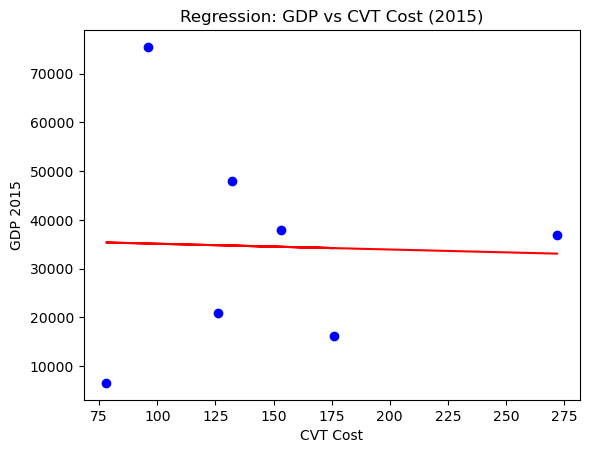

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Your existing DataFrame
data = {
    'CVT_cost': [272, 78, 96, 126, 176, 153, 132],
    'country': ['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE'],
    'GDP_2015': [36860, 6560, 75460, 20810, 16230, 37950, 47900]
}

df = pd.DataFrame(data)

# Clean CVT_cost if there are non-numeric entries
df['CVT_cost'] = pd.to_numeric(df['CVT_cost'], errors='coerce')
df = df.dropna()

# Regression
X = sm.add_constant(df['CVT_cost'])  # add intercept
y = df['GDP_2015']

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot
plt.scatter(df['CVT_cost'], df['GDP_2015'], color='blue')
plt.plot(df['CVT_cost'], model.predict(X), color='red')
plt.xlabel('CVT Cost')
plt.ylabel('GDP 2015')
plt.title('Regression: GDP vs CVT Cost (2015)')
plt.show()

Given the available data for 2015 and 2020, the proposed research focuses on examining whether vocational training investment served as a buffer during the COVID-19 shock. While post-2020 recovery data are not available, it is still possible to assess shock resilience by analyzing whether countries with higher pre-pandemic vocational training expenditures experienced smaller GDP declines in 2020. In this framework, the x-variable represents the vocational training cost per employee in 2015 (or 2020, if more recent pre-pandemic data are available), while the y-variable measures GDP decline in 2020, calculated as the percentage change relative to the previous year. This approach allows the study to capture whether higher training levels contributed to countries’ ability to withstand sudden economic shocks.

To apply the Fechner correlation coefficient, GDP declines are transformed into a measure of resilience, where higher values indicate smaller losses or better shock absorption. The sign-based Fechner methodology then evaluates whether countries with above-average training investment tend to align with above-average resilience, and conversely, whether countries with below-average training correspond to below-average resilience. A positive Fechner correlation would indicate that pre-pandemic training investments were generally associated with better economic shock absorption, while a negative correlation would suggest the opposite.

This analysis provides a robust, cross-country perspective on the role of vocational training in macroeconomic stability during a crisis. By focusing on directional co-movement rather than the magnitude of effects, the study accounts for structural differences among countries, such as population size, wage levels, and economic maturity, which could distort traditional regression analyses. In this way, the research can offer insights into the potential of workforce development policies to enhance economic resilience in the face of large-scale shocks such as the COVID-19 pandemic.

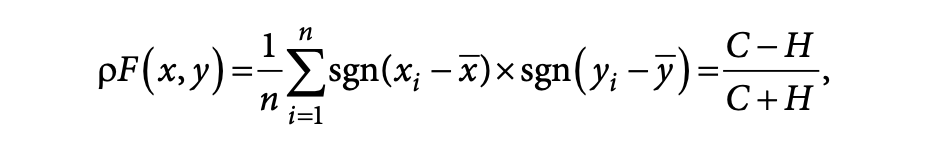

In [1]:
from IPython.display import Image, display

# Display an image file in the notebook
display(Image(filename='coefficient.png'))

**Step 2: Evaluating the Impact of the COVID Shock**

Following the study of Alejandro Lavopa and Carolina Donnelly, which developed a novel GDP loss index to evaluate the economic impact of COVID-19, I will investigate the determinants of cross-country resilience and vulnerability during the pandemic and see if there is also a correlation between GDP loss index and the costs of vocational training. The GDP loss index captures both the magnitude of the initial economic shock and the subsequent rate of recovery at the country level. Using a dataset of 125 countries, we apply cross-sectional regression techniques to estimate the influence of pandemic-specific and structural factors on the index. Special attention is given to an aspect underexplored in the existing literature: the role of industrial capabilities. Our results indicate that strong industrial capabilities significantly enhanced countries’ capacity to absorb the shock and maintain economic stability. These findings provide new empirical evidence on the importance of manufacturing sectors in strengthening national resilience to unexpected crises.

**Step 3: Describing the Scale of Impact for Vocational Training Cost on Economic Resillience**

The objective of this section is to develop and validate a regression model to quantify the relationship between vocational training investments and economic resilience. Specifically, the analysis seeks to estimate how variations in the cost and intensity of vocational training influence a country’s capacity to withstand and recover from economic shocks. By establishing a statistically robust model, the study aims to identify the magnitude and direction of the effect, providing precise estimates of the potential increase or decrease in economic resilience attributable to changes in vocational training expenditure. This approach allows for a nuanced understanding of the role of human capital development in enhancing macroeconomic stability during periods of crisis.

**Step 4: Visualize the Pattern Through a Map, Finding Patterns**

To visually illustrate the relationship between vocational training (VCT) investments and economic resilience across European Union countries, this study plans to incorporate a map-based representation alongside other graphical tools. These visualizations will highlight spatial patterns and variations in VCT training costs and corresponding resilience measures, providing an intuitive, comparative view of how investment in human capital relates to countries’ capacity to withstand economic shocks.